/home/ysn/anaconda3/envs/test3/lib/python3.12/site-packages/SFOF4S/model/converted_model.pt already exists.
/home/ysn/anaconda3/envs/test3/lib/python3.12/site-packages/SFOF4S/processor


100%|██████████| 582/582 [01:25<00:00,  6.79it/s]


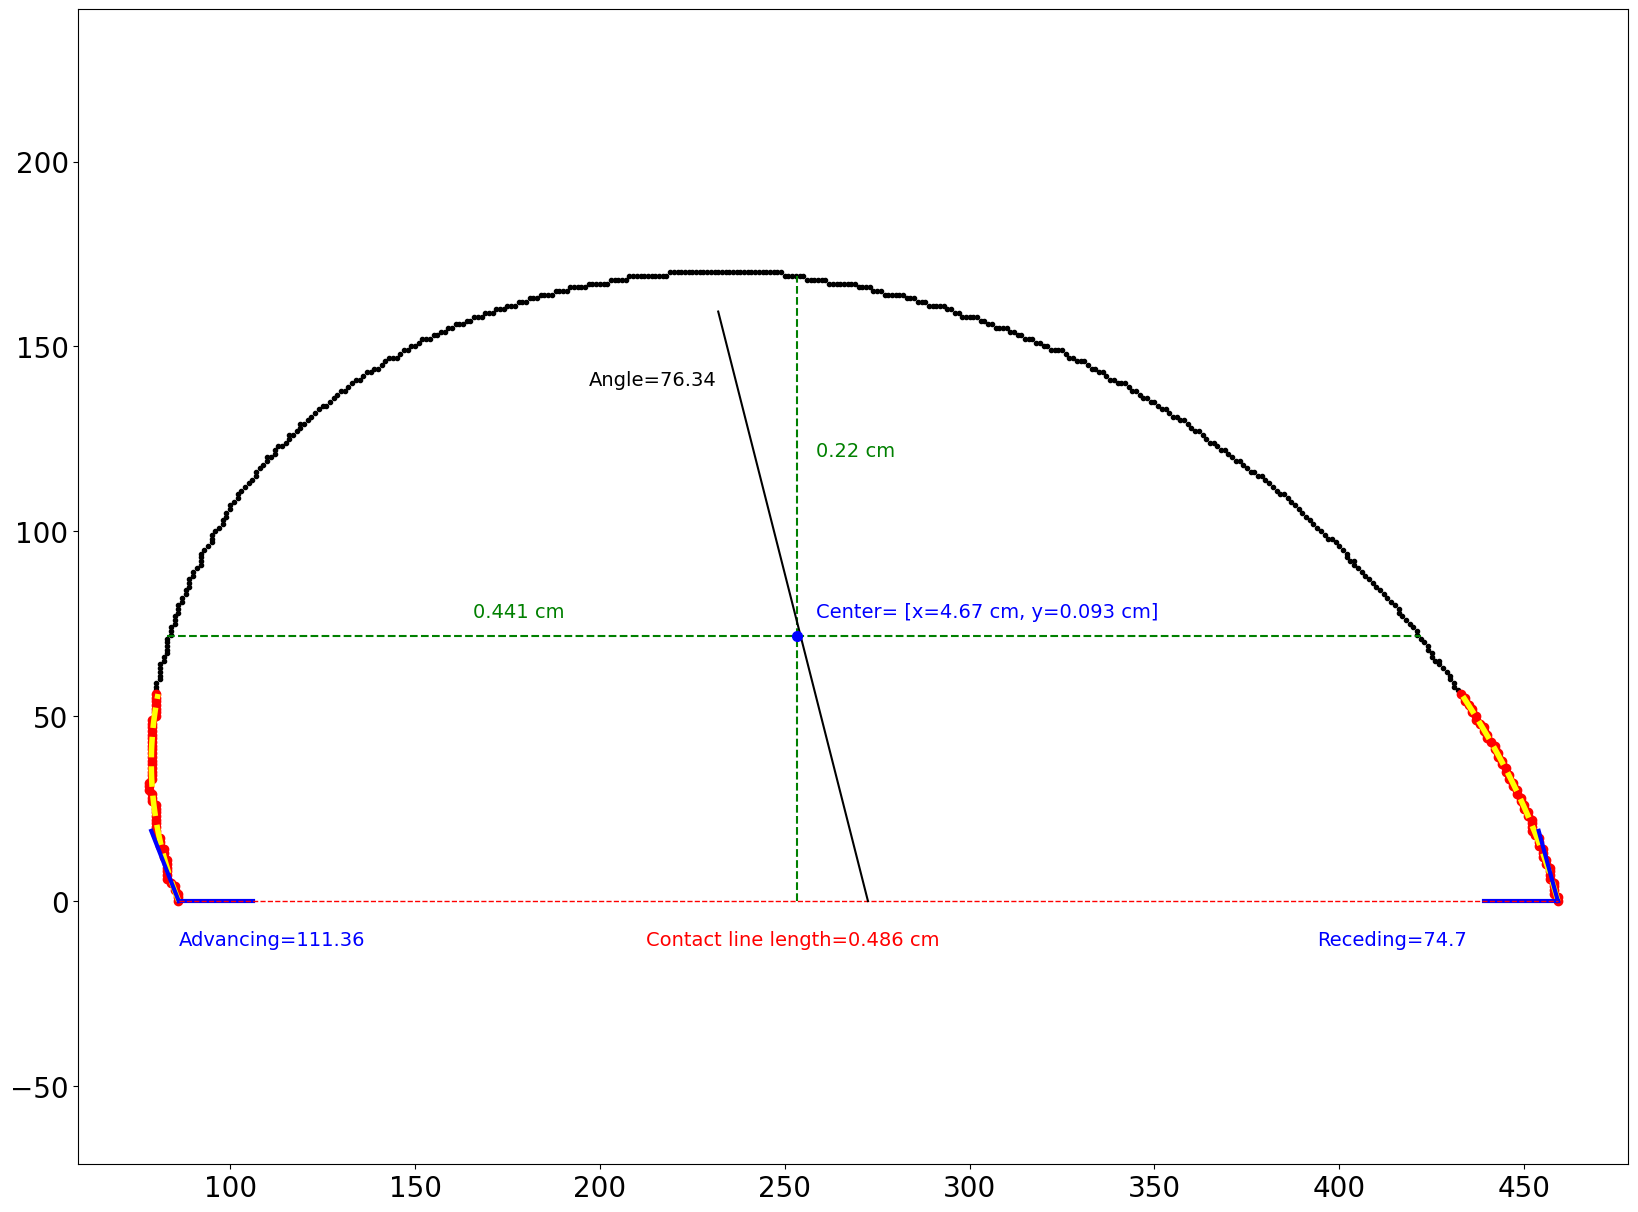

In [1]:
import SFOF4S
import SFOF4S.model
import SFOF4S.processor
import SFOF4S.utils


framework = SFOF4S.model.initiation("torch")

# set variables
ad                          = r"PFOTS sample with a defect"
fps                         = 1000
cm_on_pixel_ratio           = 0.0039062
num_px_ratio                = (0.0039062)/cm_on_pixel_ratio
error_handling_kernel_size  = (5,5)
SFOF4S.utils.make_folders(ad)

df = SFOF4S.processor.main_processor(ad,
                                    framework,
                                    num_px_ratio,
                                    cm_on_pixel_ratio,
                                    fps,
                                    error_handling_kernel_size)

# Batch analysis cell
Batch analysis involves processing multiple files in one go, and this cell helps by specifying the path to the main folder containing all the subfolders for analysis.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

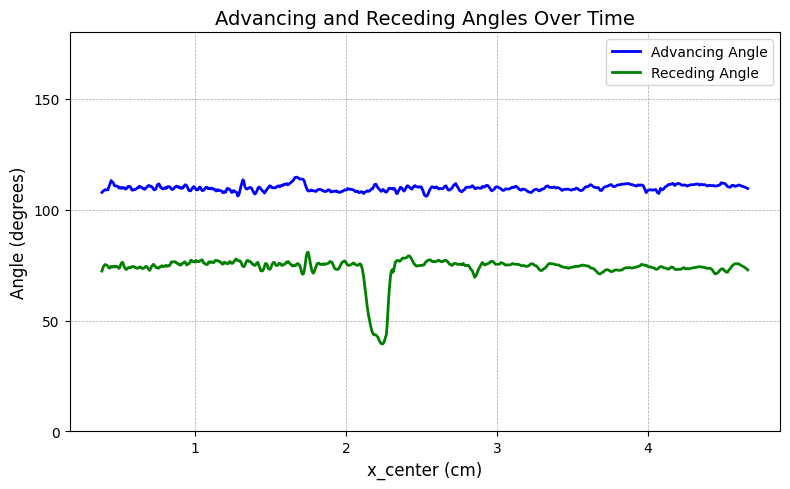

In [3]:
plt.figure(figsize=(8, 5))  # Adjust the size of the figure
plt.plot(df["x_center (cm)"], df["adv (degree)"], label="Advancing Angle", color="blue", linestyle="-", linewidth=2)
plt.plot(df["x_center (cm)"], df["rec (degree)"], label="Receding Angle", color="green", linestyle="-", linewidth=2)

# Adding titles and labels
plt.title("Advancing and Receding Angles Over Time", fontsize=14)
plt.xlabel("x_center (cm)", fontsize=12)
plt.ylabel("Angle (degrees)", fontsize=12)

# Customizing the grid
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.ylim(0, 180)

# Adding a legend
plt.legend(fontsize=10, loc="best")

# Improving axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()  # Ensures everything fits well
plt.show()
